# **RNN LSTM for cwnd 3 Algos**

**Importing necessary packages, modules**

In [1]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers.merge import Concatenate
from keras.layers import Bidirectional
from keras import optimizers

from sklearn.preprocessing import OneHotEncoder

import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
import io

**Getting dataset : x_array, y_array (from file)**

In [2]:
from google.colab import files
uploaded = files.upload()

df_x = pd.read_csv(io.BytesIO(uploaded['x_dataset_full.csv']),header=None)
data_x = df_x.values
df_y = pd.read_csv(io.BytesIO(uploaded['y_dataset_full.csv']),header=None)
data_y = df_y.values

X = np.array(data_x).reshape(3000,128,1)
Y = np.array(data_y)
# Y1 = np.array(data_y1)
# encoder = OneHotEncoder(sparse=False)
Y = pd.get_dummies(df_y).values
print(X)
print(Y)

Saving x_dataset_full.csv to x_dataset_full.csv
Saving y_dataset_full.csv to y_dataset_full.csv
[[[0.1       ]
  [0.11750547]
  [0.13369803]
  ...
  [0.88949672]
  [0.89387308]
  [0.89737418]]

 [[0.1       ]
  [0.12830882]
  [0.15082721]
  ...
  [0.89191177]
  [0.89494485]
  [0.89797794]]

 [[0.1       ]
  [0.12945959]
  [0.15289335]
  ...
  [0.89081779]
  [0.89426112]
  [0.89770445]]

 ...

 [[0.1       ]
  [0.1       ]
  [0.11695322]
  ...
  [0.9       ]
  [0.9       ]
  [0.9       ]]

 [[0.1       ]
  [0.1       ]
  [0.11287356]
  ...
  [0.89126437]
  [0.89126437]
  [0.9       ]]

 [[0.1       ]
  [0.1       ]
  [0.11591198]
  ...
  [0.9       ]
  [0.9       ]
  [0.9       ]]]
[[0 1 0]
 [0 1 0]
 [0 1 0]
 ...
 [0 0 1]
 [0 0 1]
 [0 0 1]]


In [3]:
print(X[0][23])
print(Y[1000])

[0.36555799]
[1 0 0]


**Train Test Split**

In [4]:
# # split a dataset into train and test sets
from sklearn.model_selection import train_test_split

# split into train test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=64)

print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)
Y_train


(2010, 128, 1) (990, 128, 1) (2010, 3) (990, 3)


array([[0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       ...,
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1]], dtype=uint8)

**LSTM Model**

In [5]:
model = Sequential()

model.add(LSTM(64, input_shape=(128, 1))) # Use 50 units for 0.82 accuracy
# model.add(LSTM(256, return_sequences=True))
# model.add(LSTM(128, return_sequences=True))
# model.add(LSTM(64, return_sequences=True))
# model.add(LSTM(32))
opt = optimizers.Adam(learning_rate = 0.0002)

model.add(Dense(3))
model.add(Activation('softmax'))

# model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 64)                16896     
_________________________________________________________________
dense (Dense)                (None, 3)                 195       
_________________________________________________________________
activation (Activation)      (None, 3)                 0         
Total params: 17,091
Trainable params: 17,091
Non-trainable params: 0
_________________________________________________________________
None


**Training (Given dataset)**

In [6]:
history=model.fit(X_train, Y_train, epochs=100, validation_split=0.2,batch_size=16, verbose=1)
# history=model.fit(X_train, Y_train, epochs=100, validation_split=0.2,batch_size=16, verbose=1


Epoch 1/100
101/101 [==============================] - 24s 66ms/step - loss: 1.0985 - accuracy: 0.3468 - val_loss: 1.0990 - val_accuracy: 0.3259
Epoch 2/100
101/101 [==============================] - 6s 57ms/step - loss: 1.0994 - accuracy: 0.3029 - val_loss: 1.0984 - val_accuracy: 0.3507
Epoch 3/100
101/101 [==============================] - 6s 57ms/step - loss: 1.0989 - accuracy: 0.3244 - val_loss: 1.0989 - val_accuracy: 0.3234
Epoch 4/100
101/101 [==============================] - 6s 57ms/step - loss: 1.0992 - accuracy: 0.3212 - val_loss: 1.0980 - val_accuracy: 0.3507
Epoch 5/100
101/101 [==============================] - 6s 58ms/step - loss: 1.0988 - accuracy: 0.3420 - val_loss: 1.0982 - val_accuracy: 0.3259
Epoch 6/100
101/101 [==============================] - 6s 58ms/step - loss: 1.0992 - accuracy: 0.3250 - val_loss: 1.0977 - val_accuracy: 0.3507
Epoch 7/100
101/101 [==============================] - 6s 58ms/step - loss: 1.0986 - accuracy: 0.3251 - val_loss: 1.0976 - val_accuracy

**Testing (test input)**

In [7]:
from matplotlib import pyplot as plt
import tensorflow as tf
# print(len(Y_test))
pred=model.predict(X_test)

print ('test loss, test acc:', model.evaluate(X_test, Y_test))


31/31 [==============================] - 1s 18ms/step - loss: 0.3881 - accuracy: 0.8121
test loss, test acc: [0.3881269693374634, 0.8121212124824524]


**Graphs**

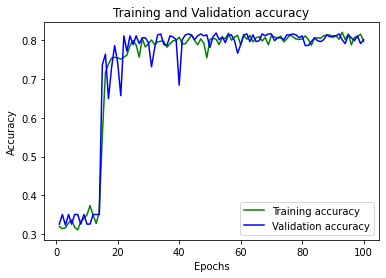

In [9]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']



epochs = range(1,101)
plt.plot(epochs, loss_train, 'g', label='Training accuracy ')
plt.plot(epochs, loss_val, 'b', label='Validation accuracy')
# plt.plot(epochs, loss_train1, 'g', label='Training accuracy(Demo 1)')
# plt.plot(epochs, loss_val1, 'b', label='validation accuracy(Demo 1)')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()